# **DSCI100 002 FINAL PROJECT**
*By Shayda Yellowknee, 17359985*

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts


#### **INTRODUCTION**

##### Background

##### Question: Can a player's age predict the total time they spend playing on Minecraft?

##### Data Description


#### **METHODS AND RESULTS**

In [27]:
#load libraries
library(tidyverse)
library(repr)
library(lubridate)
library(tidymodels)
library(janitor)
options(repr.matrix.max.rows = 6)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [28]:
#read in data
players<-read_csv("players.csv")
sessions<-read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
#inspect data
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [32]:
#preparing sessions data
#calculating total playtime per player

sessions_clean<-sessions|>
mutate(start_time=dmy_hm(start_time),
       end_time=dmy_hm(end_time),
      session_minutes=as.numeric(end_time-start_time)/60)|>
clean_names() #renames columns from hashedEmail to hashed_email

sessions_clean

player_sessions_summary<-sessions_clean|>
group_by(hashed_email)|>
summarize(total_minutes=sum(session_minutes, na.rm=TRUE), 
          session_count=n())

player_sessions_summary

hashed_email,start_time,end_time,original_start_time,original_end_time,session_minutes
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,0.2000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,0.2166667
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,0.3833333
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12,0.3500000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12,0.1166667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12,0.3166667


hashed_email,total_minutes,session_count
<chr>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1.7666667,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.5000000,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.1833333,1
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,79.91667,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,0.15000,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1.20000,1


In [33]:
#clean players data

players_clean<-players|>
clean_names()|>
mutate(age=as.numeric(age))

players_clean


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [36]:
#join players data with sessions summary

minecraft_data<-players_clean|>
left_join(player_sessions_summary, by="hashed_email")|>
filter(!is.na(age),
       !is.na(total_minutes)) #filtering out missing age/total_minutes values, cleaning data

minecraft_data

experience,subscribe,hashed_email,played_hours,name,gender,age,total_minutes,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,33.65000000,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,4.25000000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0.08333333,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,0.35000000,1
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,0.08333333,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,2.98333333,6


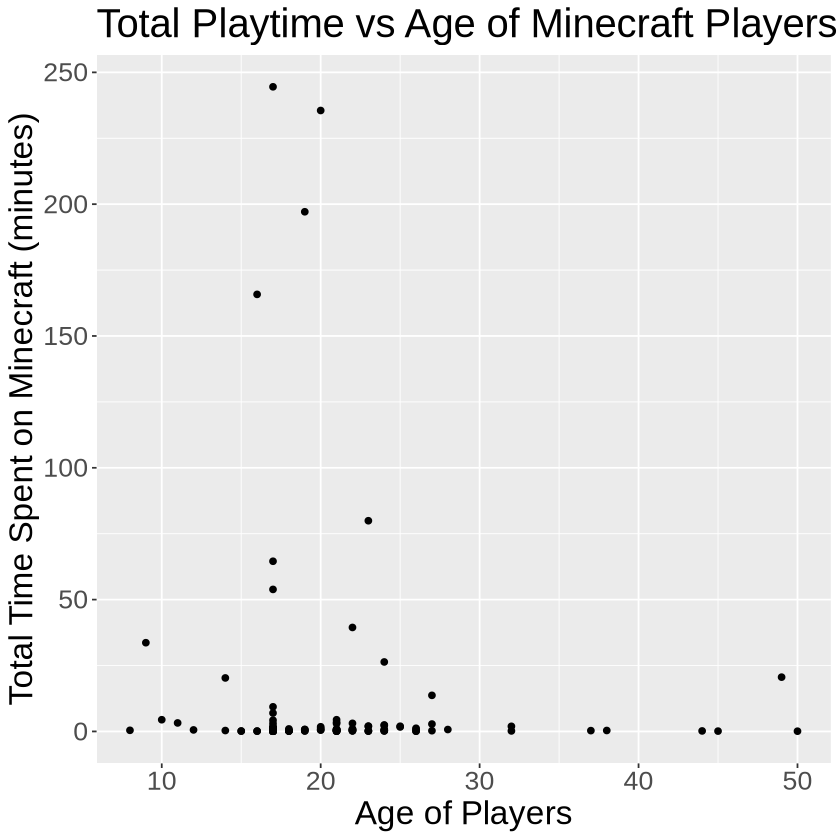

In [39]:
#visualize this data

minecraft_plot<-ggplot(minecraft_data, aes(x=age, y=total_minutes))+
geom_point()+
labs(x="Age of Players", y="Total Time Spent on Minecraft (minutes)",
     title="Total Playtime vs Age of Minecraft Players")+
theme(text=element_text(size=20))

minecraft_plot

In [40]:
#create training set and testing set
set.seed(123)

minecraft_split<-initial_split(minecraft_data, prop=0.75, strata=total_minutes)
minecraft_train<-training(minecraft_split)
minecraft_test<-testing(minecraft_split)

In [41]:
#create linear regression model
lm_spec<-linear_reg()|>
set_engine("lm")|>
set_mode("regression")

In [43]:
#create recipe
lm_recipe<-recipe(total_minutes~ age, data=minecraft_train)

In [45]:
#create workflow

lm_fit<-workflow()|>
add_recipe(lm_recipe)|>
add_model(lm_spec)|>
fit(data=minecraft_train)

In [46]:
#predict on test data!!! evaluate the performance 
lm_test_results<-lm_fit|>
predict(minecraft_test)|>
bind_cols(minecraft_test)|>
metrics(truth=total_minutes, estimate=.pred)

print(lm_test_results)

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     30.4   
2 rsq     standard      0.0169
3 mae     standard     16.5   


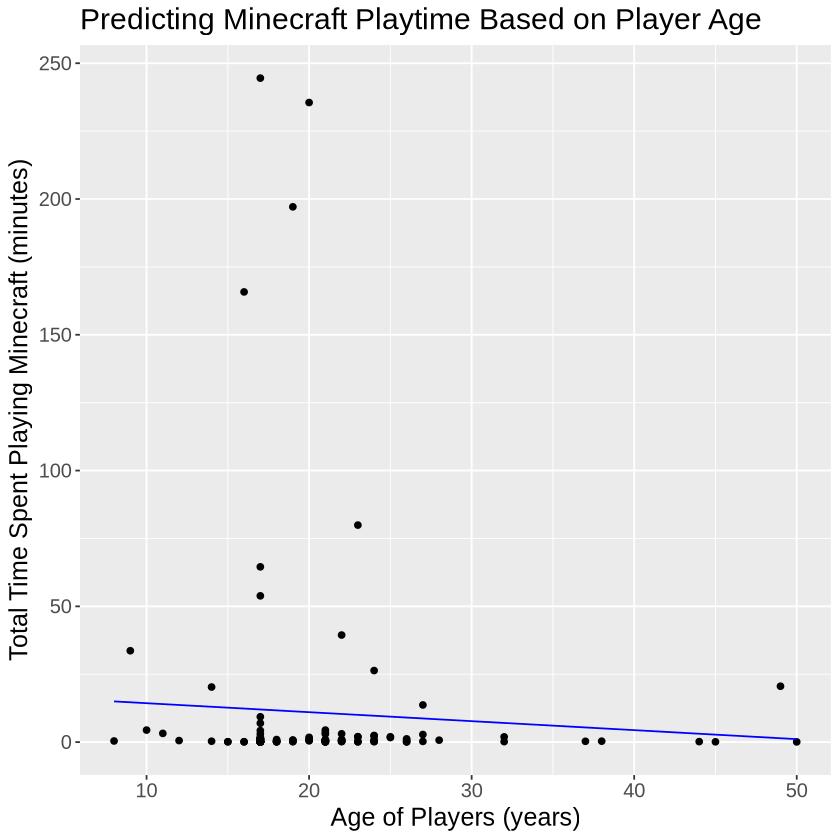

In [48]:
#visualize!
lm_preds<-lm_fit|>
predict(minecraft_data)|>
bind_cols(minecraft_data)

minecraft_preds_plot<- ggplot(lm_preds, aes(x=age, y=total_minutes))+
geom_point()+
geom_line(aes(y=.pred), color="blue")+
labs(x="Age of Players (years)", y= "Total Time Spent Playing Minecraft (minutes)",
     title="Predicting Minecraft Playtime Based on Player Age")+
theme(text=element_text(size=15))

minecraft_preds_plot

#### **DISCUSSION**